# 0. Load Packages and Data

In [2]:
# Import all the useful libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
import pickle
import copy
warnings.filterwarnings('ignore')
%matplotlib inline
import pylab
import json
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

plt.style.use('fivethirtyeight')
import base64
import io
from scipy.misc import imread
import codecs
from IPython.display import HTML
import collections

In [105]:
credits = pd.read_csv("~/Documents/GR5291Group8/Data/tmdb_5000_credits.csv")
movies = pd.read_csv("~/Documents/GR5291Group8/Data/tmdb_5000_movies.csv")

In [106]:
df=movies.merge(credits,left_on='id',right_on='movie_id',how='left')

# 1. Analyzing feature types

In [107]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew'],
      dtype='object')

In [108]:
df.dtypes.value_counts()

object     16
int64       5
float64     3
dtype: int64

In [109]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64

In [110]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent'] > .05]

,Total,Percent
homepage,3091,0.644
tagline,844,0.176


In [111]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.438,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.200,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.083,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.900,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.377,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.300,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.313,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.600,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.927,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.100,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# 2. Data Cleaning

In [112]:
# leave ID
id_variable = df['id']

In [113]:
# drop unuseful features
df.drop("movie_id", axis=1, inplace=True)
df.drop("id", axis=1, inplace=True)
df.drop("homepage", axis=1, inplace=True)
df.drop("title_x", axis=1, inplace=True)
df.drop("title_y", axis=1, inplace=True)
df.drop("original_title", axis=1, inplace=True)
df.drop("status", axis=1, inplace=True)
df.drop("original_language", axis=1, inplace=True)

In [114]:
# drop NA
df.dropna(subset=['release_date'],inplace=True)
df.dropna(subset=['runtime'],inplace=True)
df.dropna(subset=['overview'],inplace=True)

In [115]:
# 'genres''production_countries''production_companies''keywords''cast''spoken_languages''crew'
def from_jason_to_string(df,col):
    df[col]=df[col].apply(json.loads)
    for index,i in zip(df.index,df[col]):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j]['name']))
        df.loc[index,col]=str(list1) 

from_jason_to_string(df,'genres')

from_jason_to_string(df,'production_countries')

from_jason_to_string(df,'production_companies')

from_jason_to_string(df,'keywords')

from_jason_to_string(df,'cast')

from_jason_to_string(df,'spoken_languages')

df['crew']=df['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
df['crew']=df['crew'].apply(director)
df.rename(columns={'crew':'director'},inplace=True)

In [116]:
# only choose first two main cast from 'cast'
def choose_first_two(list):
    if len(list)>0:
        return list[0:2]
df['cast'] = df['cast'].str.split(',').apply(choose_first_two)

In [117]:
# change 'release date' into 'year' and 'month'
def extract_year(list):
    if len(list)>0:
        return list[0]
def extract_month(list):
    if len(list)>0:
        return list[1]
df['year'] = df['release_date'].str.split('-').apply(extract_year)
df['month'] = df['release_date'].str.split('-').apply(extract_month)

In [118]:
# drop 0 outliers
df = df[(df[['budget','runtime','vote_average','revenue']] != 0).all(axis=1)]

In [119]:
# since there are some outliers in "budget" and "revenue", we move outliers out of the 95% CI
df_budget_lowerbound = np.percentile(df['budget'],2.5)
df_budget_upperbound = np.percentile(df['budget'],97.5)
df_revenue_lowerbound = np.percentile(df['revenue'],2.5)
df_revenue_upperbound = np.percentile(df['revenue'],97.5)
df = df[(df[['budget']] >= df_budget_lowerbound).all(axis=1)]
df = df[(df[['budget']] <= df_budget_upperbound).all(axis=1)]
df = df[(df[['revenue']] >= df_revenue_lowerbound).all(axis=1)]
df = df[(df[['revenue']] <= df_revenue_upperbound).all(axis=1)]

In [125]:
# add feature 'return rate'
df['return_rate'] = ((df['revenue']/df['budget'])-1)*100
# df[(df[['return_rate']] > 5000).all(axis=1)]

In [121]:
# save cleaned data to csv
df.to_csv('~/Documents/GR5291Group8/Data/cleaned_movie_data.csv')

In [379]:
# change categorical features into multi hot
df['genres'] = df.genres.apply(lambda x: x[1:-1].replace('"', '').replace("'", '').split(','))
genre_list = [[genre.lstrip() for genre in record] for record in list(df['genres'])]
genres = set()
for record in genre_list:
    for genre in record:
        if genre != '':
            genres.add(genre)
new_frame = pd.DataFrame(0, index=np.arange(len(genre_list)), columns=[genre for genre in genres if genre != ''])
for index, record in enumerate(genre_list):
    for genre in record:
        if genre != '':
            new_frame.iloc[index][genre] = 1
df = pd.concat([df, new_frame], axis=1)

In [380]:
df['spoken_languages'] = df.spoken_languages.apply(lambda x: x[1:-1].replace('"', '').replace("'", '').split(','))
spoken_languages_list = [[spoken.lstrip() for spoken in record] for record in list(df['spoken_languages'])]
spoken_languages = set()
for record in spoken_languages_list:
    for spoken in record:
        if spoken != '':
            spoken_languages.add(spoken)
new_frame1 = pd.DataFrame(0, index=np.arange(len(spoken_languages_list)), columns=[spoken for spoken in spoken_languages if spoken != ''])
for index, record in enumerate(spoken_languages_list):
    for spoken in record:
        if spoken != '':
            new_frame1.iloc[index][spoken] = 1
df = pd.concat([df, new_frame1], axis=1)

In [381]:
df.drop("genres", axis=1, inplace=True)
df.drop("spoken_languages", axis=1, inplace=True)

In [382]:
# save multi-hot data to csv
df.to_csv('~/Documents/GR5291Group8/Data/cleaned_movie_data_with_categorical.csv')

# 3. Graphing Summary Statistics

In [9]:
# load cleaned data
df = pd.read_csv("/Users/apple/Documents/GR5291Group8/Data/cleaned_movie_data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

In [11]:
df.shape

(2964, 19)

In [127]:
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,return_rate
count,2964.000,2964.000,2964.000,2964.000,2964.000,2964.000,2964.000
mean,37050855.002,26.995,100646212.555,110.603,6.299,865.081,324.023
std,34591351.017,27.542,120384721.098,20.387,0.851,1150.616,993.468
min,560000.000,0.020,354704.000,41.000,3.000,1.000,-99.298
25%,12000000.000,10.813,18800024.000,97.000,5.800,188.000,4.395
50%,25515000.000,20.315,55978160.500,107.000,6.300,459.000,125.824
75%,50000000.000,35.829,135387643.000,120.000,6.900,1060.000,322.917
max,170000000.000,724.248,691210692.000,338.000,8.500,10867.000,31070.997


# 4. Graphing Data Distribution

In [102]:
categorical_variable = ['genres','keywords','production_companies','production_countries','year','month','spoken_languages','crew','director']
scalar_variable = ['budget','popularity','revenue','runtime','vote_average','vote_count','return_rate']
sentence_variable = ['overview','tagline']

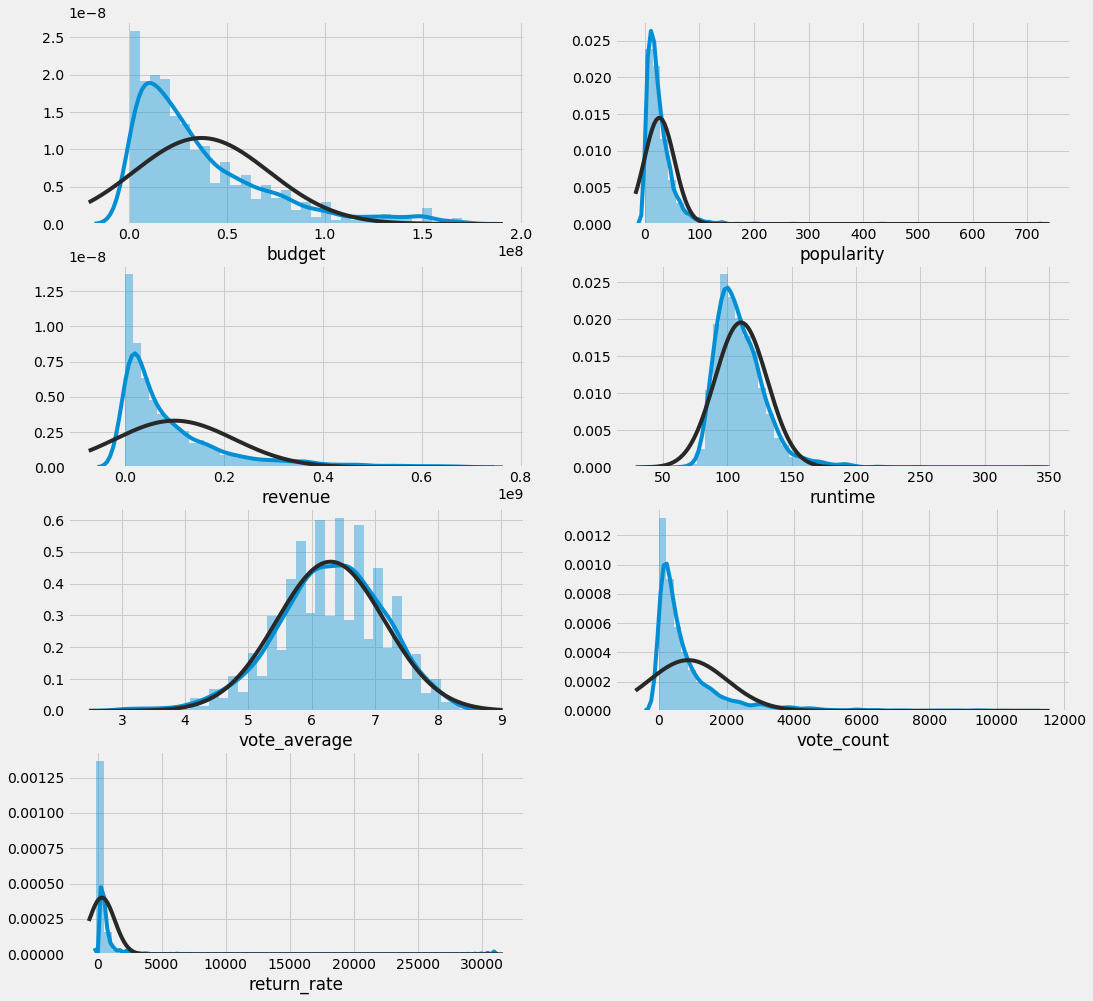

In [103]:
# For each scalar variable:
index = 0
plt.figure(figsize=(16,16))
for sca in scalar_variable:
    index += 1
    plt.subplot(4,2,index)
    plt.xlabel(sca)
    sns.distplot(df[sca].dropna(), fit=norm)

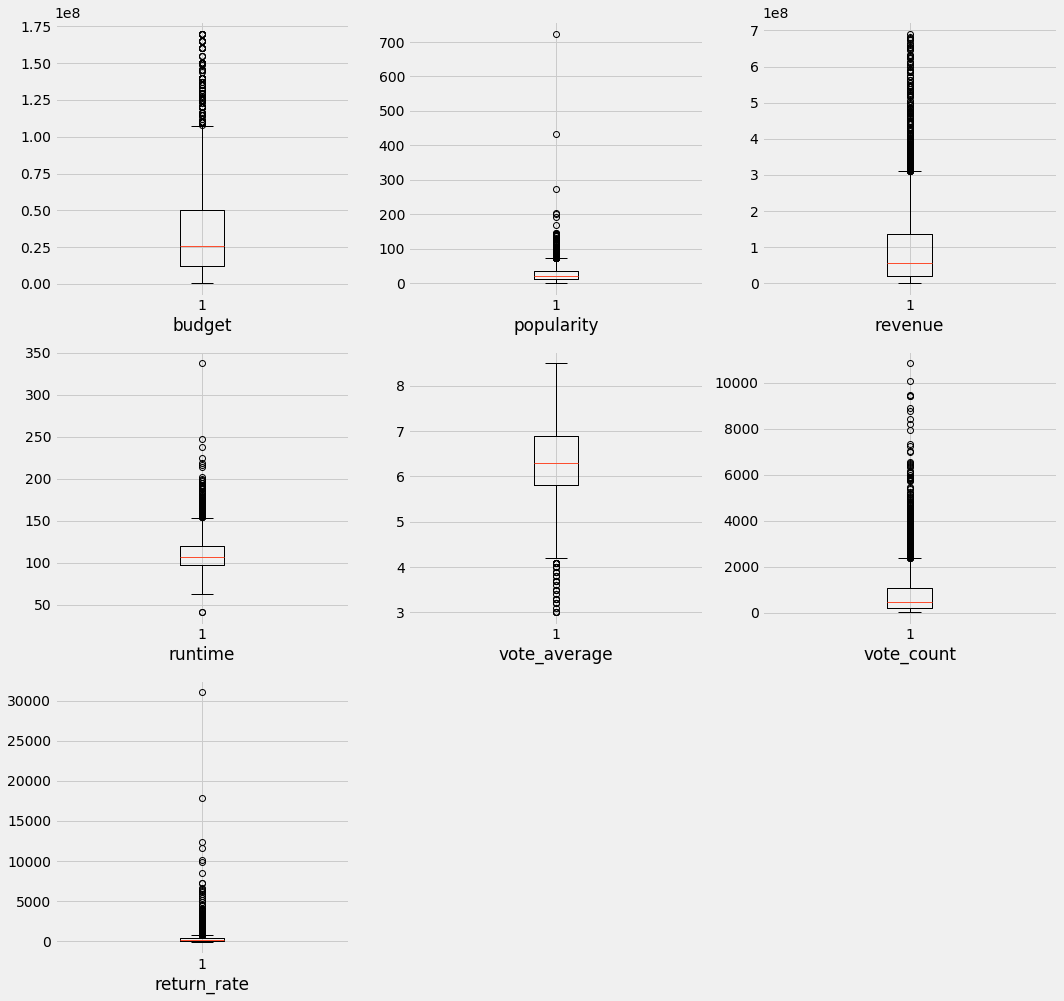

In [124]:
index = 0
plt.figure(figsize=(16,16))
for sca in scalar_variable:
    index += 1
    plt.subplot(3,3,index)
    plt.xlabel(sca)
    plt.boxplot(df[sca])
plt.show()

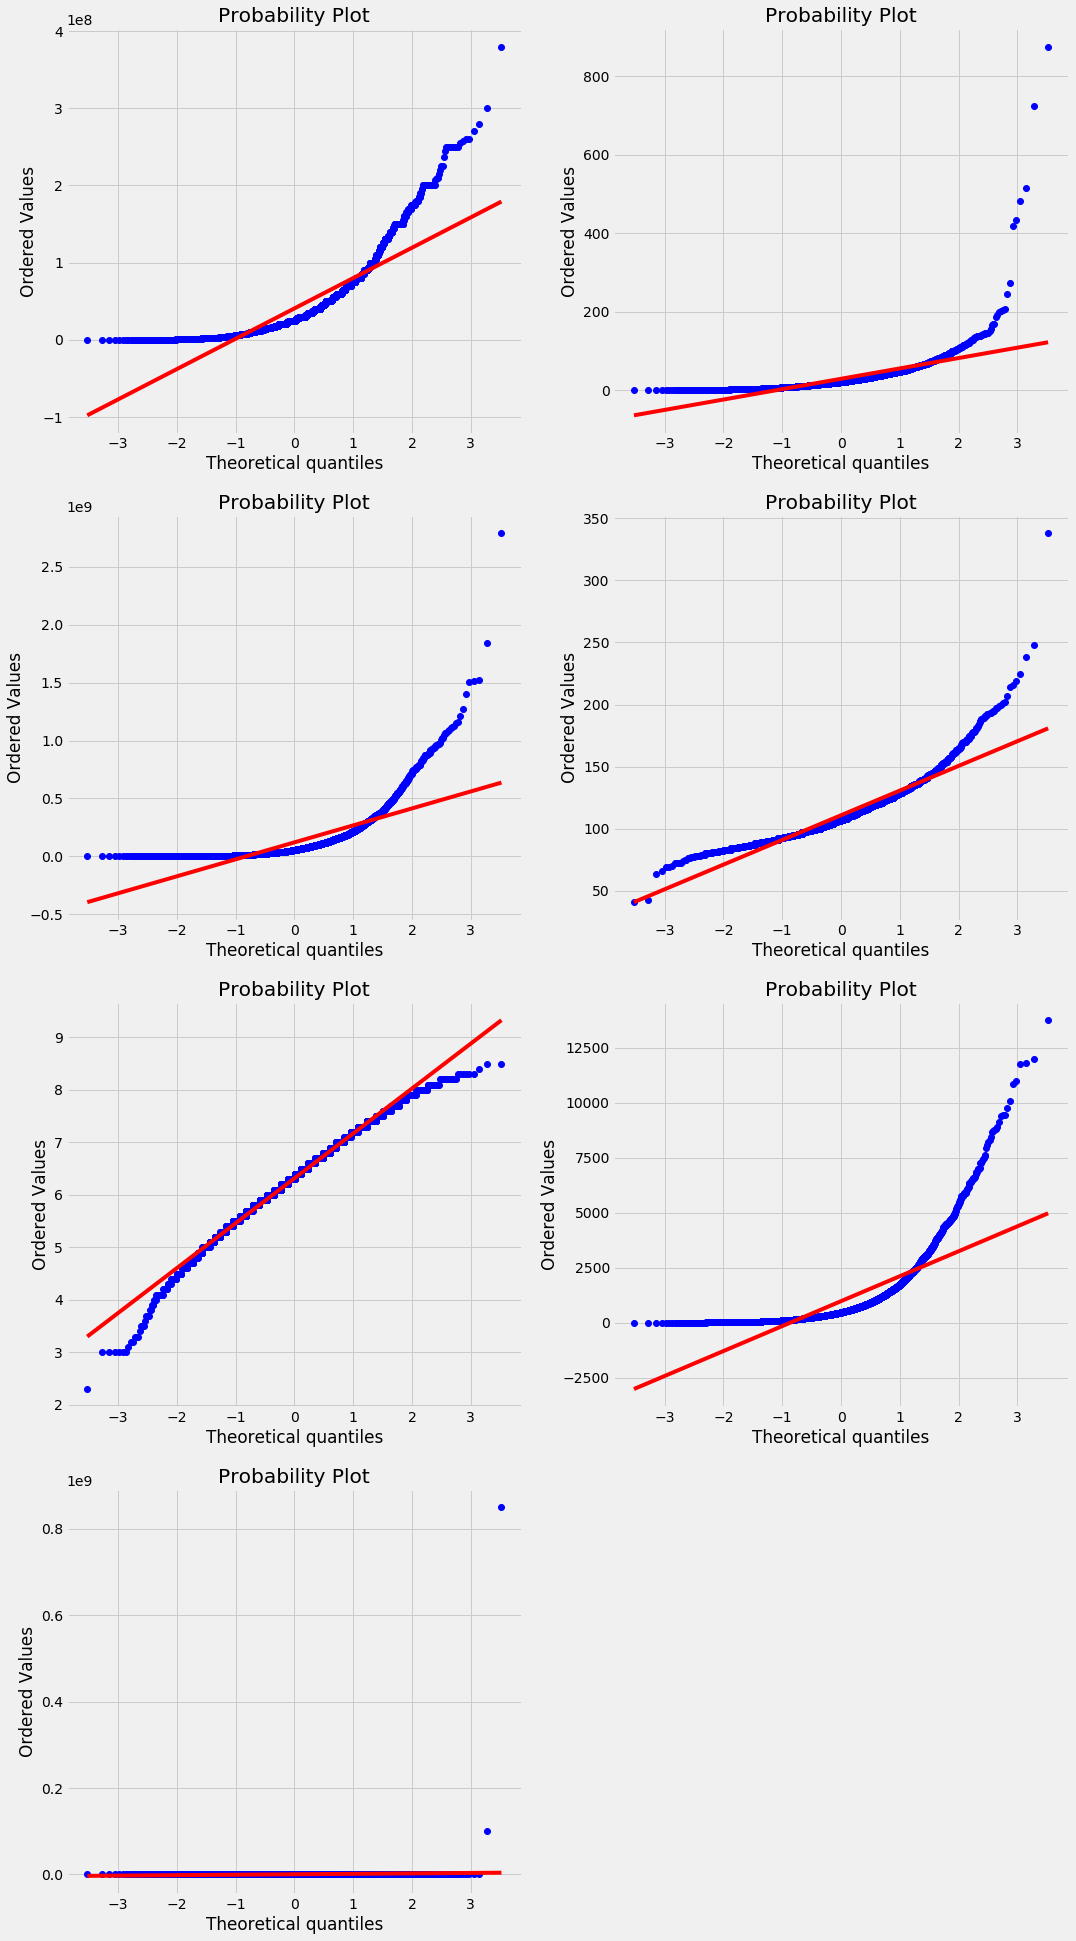

In [424]:
index = 0
plt.figure(figsize=(16,32))
for sca in scalar_variable:
    index += 1
    plt.subplot(4,2,index)
    plt.xlabel(sca)
    stats.probplot(df[sca], dist="norm", plot=pylab)
plt.show()

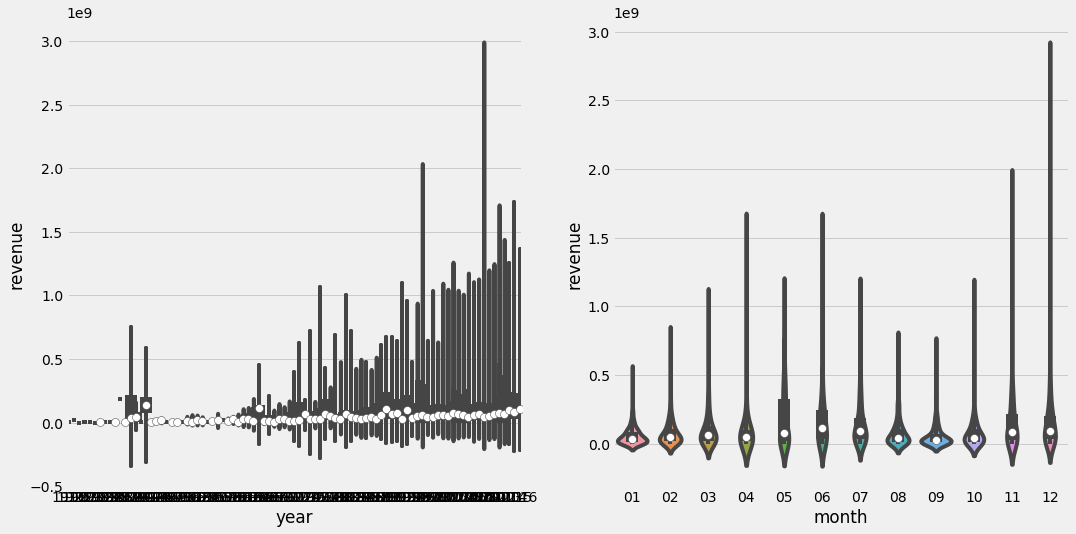

In [378]:
# For each categorical variable: 
time_variable = ['year','month']
index = 0
plt.figure(figsize=(16,8))
for cate in time_variable:
    if len(pd.unique(df[cate])) < 2000:
        index += 1
        plt.subplot(1,2,index)
        plt.xlabel(cate)
        sns.violinplot(x = cate, y = 'revenue', data = df)

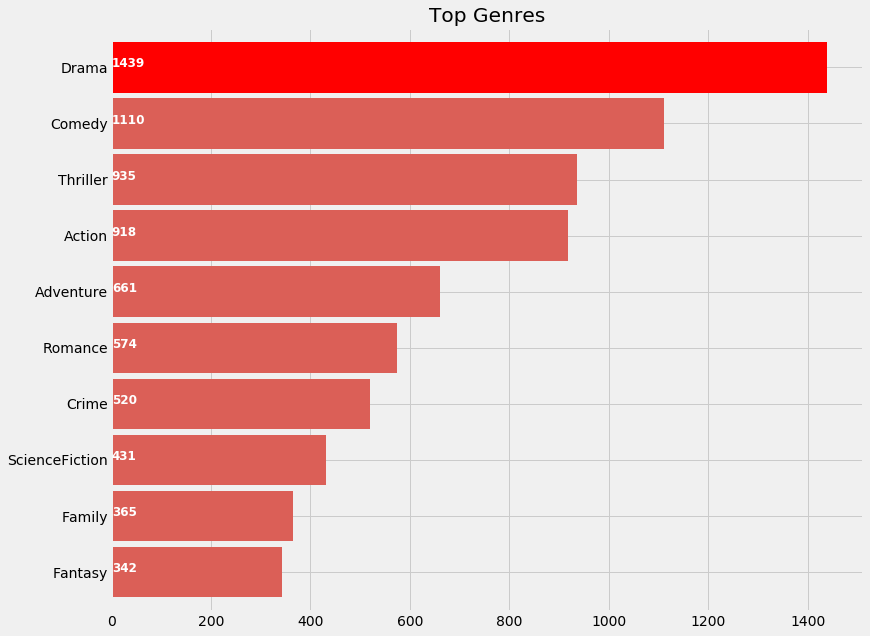

In [155]:
df['genres']=df['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['genres']=df['genres'].str.split(',')

plt.subplots(figsize=(12,10))
list1=[]
for i in df['genres']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Genres')
plt.show()

# 5. Source

https://www.kaggle.com/ash316/what-s-my-score